In [21]:
import pandas as pd
import numpy as np
import os

In [22]:
patient_data=pd.read_csv("/Users/mariya/Downloads/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv",names=['pid','disease'])

In [23]:
patient_data.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [24]:
df=pd.read_csv("/Users/mariya/Downloads/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt",sep='\t',names=['start','end','crackles','wheezes'])
df.head()

,start,end,crackles,wheezes
0,0.036,0.579,0,0
1,0.579,2.450,0,0
2,2.450,3.893,0,0
3,3.893,5.793,0,0
4,5.793,7.521,0,0


In [25]:
path="/Users/mariya/Downloads/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]

['148_1b1_Al_sc_Meditron',
 '130_3p2_Tc_mc_AKGC417L',
 '107_2b4_Al_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '174_1p4_Ar_mc_AKGC417L']

In [26]:
def getFilenameInfo(file):
    return file.split('_')
getFilenameInfo('226_1b1_Ll_sc_Meditron')

['226', '1b1', 'Ll', 'sc', 'Meditron']

In [27]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','wheezes'])
    name_data=getFilenameInfo(file)
    data['pid']=name_data[0]
    #data['disease']=name_data[]
    data['acquisition_mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,wheezes,pid,acquisition_mode,filename
0,0.022,0.364,0,0,148,sc,148_1b1_Al_sc_Meditron
1,0.364,2.436,0,0,148,sc,148_1b1_Al_sc_Meditron
2,2.436,4.636,0,0,148,sc,148_1b1_Al_sc_Meditron
3,4.636,6.793,0,0,148,sc,148_1b1_Al_sc_Meditron
4,6.793,8.750,0,0,148,sc,148_1b1_Al_sc_Meditron


In [28]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [29]:
# load dataset
df=files_df
df.head()

,start,end,crackles,wheezes,pid,acquisition_mode,filename
0,0.022,0.364,0,0,148,sc,148_1b1_Al_sc_Meditron
1,0.364,2.436,0,0,148,sc,148_1b1_Al_sc_Meditron
2,2.436,4.636,0,0,148,sc,148_1b1_Al_sc_Meditron
3,4.636,6.793,0,0,148,sc,148_1b1_Al_sc_Meditron
4,6.793,8.750,0,0,148,sc,148_1b1_Al_sc_Meditron


In [30]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      126 non-null    int64 
 1   disease  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [31]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 3
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start             6898 non-null   float64
 1   end               6898 non-null   float64
 2   crackles          6898 non-null   int64  
 3   wheezes           6898 non-null   int64  
 4   pid               6898 non-null   object 
 5   acquisition_mode  6898 non-null   object 
 6   filename          6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [32]:
patient_data.pid=patient_data.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')
data=pd.merge(files_df,patient_data,on='pid')
data.head(10)

,start,end,crackles,wheezes,pid,acquisition_mode,filename,disease
0,0.022,0.364,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
1,0.364,2.436,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
2,2.436,4.636,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
3,4.636,6.793,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
4,6.793,8.750,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
5,8.750,10.764,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
6,10.764,13.050,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
7,13.050,15.193,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
8,15.193,17.179,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI
9,17.179,19.050,0,0,148,sc,148_1b1_Al_sc_Meditron,URTI


In [33]:
row_count = len(data)
print(row_count)

6898


In [34]:
## Visualising the dataset we are using

Text(0.5, 1.0, 'Scatter Plot for viewing the distribution of duration of sound')

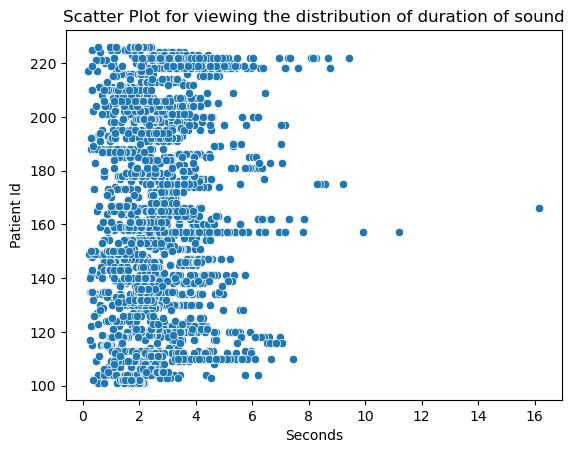

In [35]:
import seaborn as sns  # Import Seaborn and use the 'sns' alias
import matplotlib.pyplot as plt



sns.scatterplot(x=(data.end - data.start), y=data.pid)
plt.xlabel('Seconds')
plt.ylabel('Patient Id')
plt.title('Scatter Plot for viewing the distribution of duration of sound')


Text(0.5, 1.0, 'Box Plot')

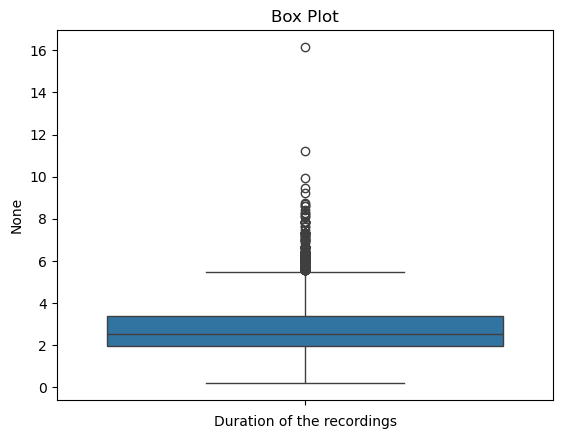

In [36]:
sns.boxplot(y=(data.end-data.start))
plt.xlabel('Duration of the recordings')
plt.title('Box Plot')

Text(0.5, 1.0, 'Histogram for vewing duration of voice records')

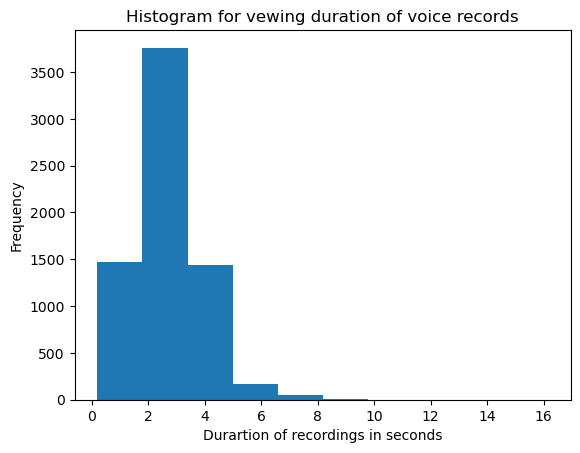

In [37]:
plt.hist(data.end-data.start, bins=10)
plt.xlabel('Durartion of recordings in seconds')
plt.ylabel('Frequency')
plt.title('Histogram for vewing duration of voice records')

In [38]:
##PREPROCESSING

In [39]:
os.makedirs('processed_audio_files')

In [40]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo

    '''
    max_ind = len(raw_data)
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

In [41]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 start                                0.022
end                                  0.364
crackles                                 0
wheezes                                  0
pid                                    148
acquisition_mode                        sc
filename            148_1b1_Al_sc_Meditron
disease                               URTI
Name: 0, dtype: object


In [42]:
import librosa as lb
import librosa.display as lbd
import librosa.util as lb_util

In [43]:
import soundfile as sf
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    start=row['start']
    end=row['end']
    filename=row['filename']

    
    if end-start>maxLen:
        end=start+maxLen

    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
      if data.iloc[index-1]['filename']==filename:
        i+=1
      else:
        i=0
    filename= filename + '_' + str(i) + '.wav'

    save_path='processed_audio_files/' + filename
    c+=1
    #print(" ",c)

    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample = getPureSample(audioArr, start, end, sampleRate)
    
    reqLen = 6 * sampleRate
   
    
    padding_needed = reqLen - len(pureSample)

    
    if padding_needed > 0:
        padded_data = np.pad(pureSample, (padding_needed // 2, padding_needed // 2), 'constant')
    else:
        padded_data = pureSample
    #padded_data = lb_util.pad_center(pureSample, reqLen, padding_value=0)
    #padded_data = lb.util.pad_center(pureSample, reqLen, padding_value=0)

    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


In [44]:
diagnosis=pd.read_csv("/Users/mariya/Downloads/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv",names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


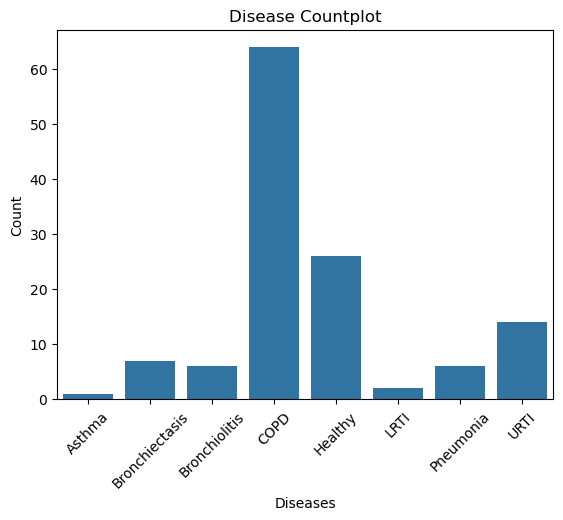

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure "diagnosis.disease" is a categorical data type
diagnosis['disease'] = diagnosis['disease'].astype('category')

# Create the countplot
sns.countplot(data=diagnosis, x='disease')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Diseases')
plt.title('Disease Countplot')
plt.show()

In [46]:
def extractId(filename):
    return filename.split('_')[0]
path='/Users/mariya/processed_audio_files'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,220,220_1b2_Al_mc_LittC2SE_3.wav
1,154,154_2b4_Al_mc_AKGC417L_5.wav
2,130,130_2p5_Lr_mc_AKGC417L_3.wav
3,211,211_2p3_Tc_mc_AKGC417L_4.wav
4,221,221_2b3_Lr_mc_LittC2SE_3.wav


In [47]:
files_df.pid=files_df.pid.astype('int64') # both pid-s must be of same dtype for them to merge
merge_data=pd.merge(files_df,diagnosis,on='pid')
merge_data.head()

,pid,filename,disease
0,220,220_1b2_Al_mc_LittC2SE_3.wav,COPD
1,220,220_1b2_Al_mc_LittC2SE_2.wav,COPD
2,220,220_1b2_Al_mc_LittC2SE_0.wav,COPD
3,220,220_1b2_Al_mc_LittC2SE_1.wav,COPD
4,220,220_1b2_Al_mc_LittC2SE_5.wav,COPD


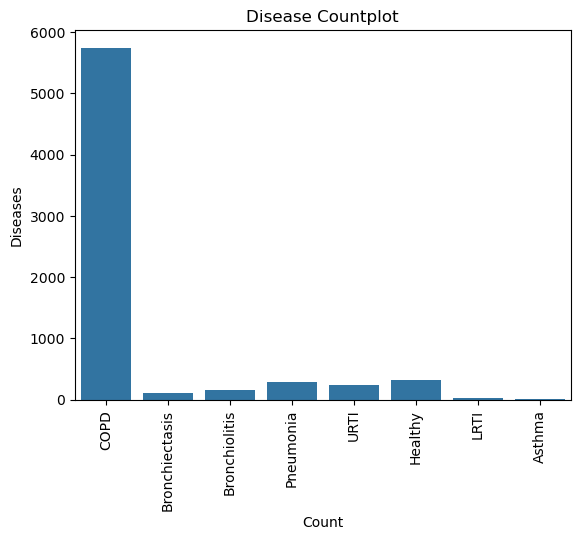

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure "merge_data.disease" is a categorical or string data type
merge_data['disease'] = merge_data['disease'].astype(str)  # Convert to string if it's not

# Create the countplot
sns.countplot(data=merge_data, x='disease')
plt.xticks(rotation=90)
plt.ylabel('Diseases')
plt.xlabel('Count')
plt.title('Disease Countplot')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [50]:
Xtrain.disease.value_counts()/Xtrain.shape[0]


disease
COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: count, dtype: float64

In [51]:
Xval.disease.value_counts()/Xval.shape[0]

disease
COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: count, dtype: float64

/Users/mariya/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


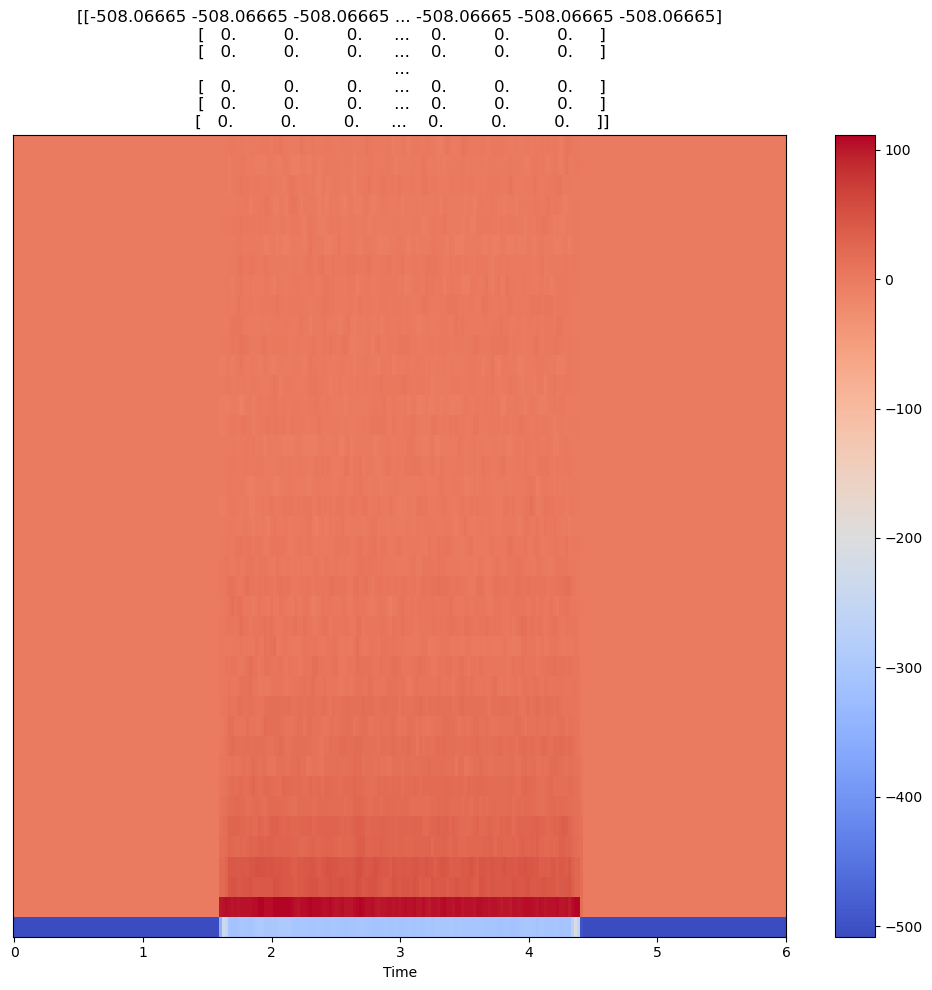

In [52]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import random  
audio_folder_path = "/Users/mariya/processed_audio_files"

all_mfccs = []

for file_name in os.listdir(audio_folder_path):
    if file_name.lower().endswith('.wav'): 
        file_path = os.path.join(audio_folder_path, file_name)
        sound, sample_rate = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
        all_mfccs.append(mfccs)


random_mfcc = random.choice(all_mfccs)
plt.figure(figsize=(10, 10))
librosa.display.specshow(random_mfcc, sr=sample_rate, x_axis='time')
plt.title(random_mfcc)
plt.colorbar()

plt.tight_layout()
plt.show()

In [53]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')

In [54]:
train=pd.read_csv("/Users/mariya/train.csv")
val=pd.read_csv("/Users/mariya/val.csv")
train.head()

,Unnamed: 0,start,end,crackles,wheezes,pid,acquisition_mode,filename,disease
0,1424,8.976,12.394,0,1,198,mc,198_1b5_Ll_mc_AKGC417L,COPD
1,5965,1.336,2.850,0,0,159,sc,159_1b1_Al_sc_Meditron,Healthy
2,484,0.042,1.785,1,0,130,mc,130_2p5_Pl_mc_AKGC417L,COPD
3,6420,0.022,1.636,0,0,194,sc,194_1b1_Lr_sc_Meditron,Healthy
4,1223,13.839,16.446,1,0,193,mc,193_7b3_Pl_mc_AKGC417L,COPD


In [55]:
ytrain=train.disease
yval=val.disease
yval

0       COPD
1       COPD
2       COPD
3       COPD
4       COPD
        ... 
1720    COPD
1721    COPD
1722    COPD
1723    COPD
1724    COPD
Name: disease, Length: 1725, dtype: object

In [56]:
train.head()

,Unnamed: 0,start,end,crackles,wheezes,pid,acquisition_mode,filename,disease
0,1424,8.976,12.394,0,1,198,mc,198_1b5_Ll_mc_AKGC417L,COPD
1,5965,1.336,2.850,0,0,159,sc,159_1b1_Al_sc_Meditron,Healthy
2,484,0.042,1.785,1,0,130,mc,130_2p5_Pl_mc_AKGC417L,COPD
3,6420,0.022,1.636,0,0,194,sc,194_1b1_Lr_sc_Meditron,Healthy
4,1223,13.839,16.446,1,0,193,mc,193_7b3_Pl_mc_AKGC417L,COPD


In [57]:
new_train = train[['filename', 'disease']]

In [58]:
path_init = "/Users/mariya/processed_audio_files"
new_train.head()    

,filename,disease
0,198_1b5_Ll_mc_AKGC417L,COPD
1,159_1b1_Al_sc_Meditron,Healthy
2,130_2p5_Pl_mc_AKGC417L,COPD
3,194_1b1_Lr_sc_Meditron,Healthy
4,193_7b3_Pl_mc_AKGC417L,COPD


In [59]:
new_train['filename'] = path_init + new_train['filename']

/var/folders/p6/jyr6k8wd4yzgcc_s2mxhn3p00000gn/T/ipykernel_1129/850116267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['filename'] = path_init + new_train['filename']


In [60]:
new_train.head()

,filename,disease
0,/Users/mariya/processed_audio_files198_1b5_Ll_...,COPD
1,/Users/mariya/processed_audio_files159_1b1_Al_...,Healthy
2,/Users/mariya/processed_audio_files130_2p5_Pl_...,COPD
3,/Users/mariya/processed_audio_files194_1b1_Lr_...,Healthy
4,/Users/mariya/processed_audio_files193_7b3_Pl_...,COPD


In [61]:
import csv
header = 'filename label chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()

In [62]:
tot_rows = len(new_train.index)

In [63]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
#import keras

import warnings
warnings.filterwarnings('ignore')

In [64]:
import os
import csv
import librosa
import numpy as np

audio_folder_path = "/Users/mariya/processed_audio_files"
output_csv_file = "/Users/mariya/extracted_audio_features.csv"


header = ["filename", "chroma_stft_mean", "rmse_mean", "spec_cent_mean", "spec_bw_mean", "rolloff_mean", "zcr_mean"]
for i in range(1, 21): 
    header.append(f"mfcc_mean_{i}")

with open(output_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)


for file_name in os.listdir(audio_folder_path):
    if file_name.lower().endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        y, sr = librosa.load(file_path, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)

        to_append = [file_name, np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)]
        to_append.extend(np.mean(mfcc, axis=1)) 
        
        with open(output_csv_file, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(to_append)

In [65]:
data = pd.read_csv("/Users/mariya/extracted_audio_features.csv")

In [66]:
data.head()


,filename,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,...,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20
0,220_1b2_Al_mc_LittC2SE_3.wav,0.523097,0.003951,335.584614,1061.151636,209.799194,0.003434,-719.82465,80.427480,33.385124,...,5.611137,5.942971,3.806516,4.076289,2.131375,3.459324,1.903986,2.863520,1.356726,1.881911
1,154_2b4_Al_mc_AKGC417L_5.wav,0.469081,0.032521,345.473680,991.639891,342.088826,0.003181,-492.73343,70.227165,27.567337,...,6.892906,6.768792,6.137089,5.314916,4.156364,4.034048,3.921781,3.654943,3.142419,2.865866
2,130_2p5_Lr_mc_AKGC417L_3.wav,0.287220,0.145938,404.779760,695.610017,812.778727,0.008188,-362.29196,42.841045,10.253718,...,5.038392,3.742775,0.428281,2.836083,3.768182,1.964367,0.737857,1.515386,0.086422,2.059474
3,211_2p3_Tc_mc_AKGC417L_4.wav,0.225378,0.104968,86.833655,219.124459,165.287272,0.000760,-441.31265,47.694060,19.540090,...,4.209378,2.210434,0.680234,1.369719,2.176386,1.757942,0.888052,0.391656,0.761946,1.342081
4,221_2b3_Lr_mc_LittC2SE_3.wav,0.608969,0.059369,170.691556,767.368106,173.262533,0.001621,-552.14404,104.657970,69.935830,...,4.407665,2.711735,2.621617,3.311017,4.207578,4.872058,4.966393,4.368769,3.316645,2.343083


In [67]:
data.describe()

,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,...,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20
count,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,...,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000
mean,0.404358,0.089286,255.912262,667.104845,382.778234,0.003703,-470.145607,64.624215,28.316192,18.669132,...,5.760622,5.237929,3.669933,3.955479,3.157976,3.348706,2.440068,2.800896,1.836797,2.020512
std,0.150990,0.083460,213.774738,405.867453,471.552447,0.005506,106.766220,27.654517,14.888761,10.383574,...,3.413125,2.918668,2.648091,2.226945,2.056680,1.802551,1.973149,2.255428,2.119779,1.609387
min,0.047120,0.000270,26.030092,66.537919,33.994548,0.000054,-939.639340,6.650437,-40.450020,-40.369293,...,-5.003946,-2.255200,-7.456606,-6.260088,-5.703544,-2.947246,-3.301977,-3.995473,-6.510463,-7.452387
25%,0.302919,0.025660,104.140777,326.219171,142.208862,0.001230,-538.889665,44.322182,18.472115,11.506572,...,3.400325,3.324926,1.930513,2.455253,1.800823,2.083756,1.116340,1.266830,0.553213,0.957714
50%,0.390757,0.064946,185.126114,588.132399,204.091899,0.002387,-455.820285,61.123674,26.733965,17.879686,...,5.319496,4.927929,3.372619,3.744873,2.918423,3.191480,2.039673,2.414175,1.387628,1.906795
75%,0.505462,0.129771,338.779847,943.730138,386.052450,0.004327,-393.610313,81.697650,36.888302,24.713448,...,7.526395,6.768099,5.001491,5.184619,4.333170,4.475466,3.463111,3.823330,2.631200,2.890406
max,0.834927,0.803913,1877.982725,2478.654807,4563.244629,0.109237,-212.220840,193.310730,117.535576,67.574460,...,21.676645,22.766367,23.318888,20.736328,15.939526,12.068207,12.578322,16.941460,15.258604,9.986284


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filename          6898 non-null   object 
 1   chroma_stft_mean  6898 non-null   float64
 2   rmse_mean         6898 non-null   float64
 3   spec_cent_mean    6898 non-null   float64
 4   spec_bw_mean      6898 non-null   float64
 5   rolloff_mean      6898 non-null   float64
 6   zcr_mean          6898 non-null   float64
 7   mfcc_mean_1       6898 non-null   float64
 8   mfcc_mean_2       6898 non-null   float64
 9   mfcc_mean_3       6898 non-null   float64
 10  mfcc_mean_4       6898 non-null   float64
 11  mfcc_mean_5       6898 non-null   float64
 12  mfcc_mean_6       6898 non-null   float64
 13  mfcc_mean_7       6898 non-null   float64
 14  mfcc_mean_8       6898 non-null   float64
 15  mfcc_mean_9       6898 non-null   float64
 16  mfcc_mean_10      6898 non-null   float64
